In [1]:
import os
import sys
import networkx as nx
import random
import numpy as np
import os
from NCPNet.brain_data import Celegans19
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import yaml
import math


/data/users/wgj/project/HemiBrain/src


In [2]:
def to_networkx(data, weight=None,to_undirected=False,remove_self_loops=False):
    if to_undirected:
        G = nx.Graph()
    else:
        G = nx.DiGraph()
    to_undirected = "upper" if to_undirected is True else to_undirected
    to_undirected_upper = True if to_undirected == "upper" else False
    to_undirected_lower = True if to_undirected == "lower" else False
    for i, (u, v) in enumerate(data.edge_index.t().tolist()):
    
        if to_undirected_upper and u > v:
            continue
        elif to_undirected_lower and u < v:
            continue

        if remove_self_loops and u == v:
            continue

        G.add_edge(u, v)

        if weight is not None:
            G[u][v]['weight'] = weight[i]
    return G



In [3]:
work_dir='.'
task_name='C.Elegans19'
path=os.path.join(work_dir,'data',task_name)
dataset=Celegans19(path)
G=to_networkx(dataset.data,weight=dataset.data.edge_weight)


In [4]:
density=nx.density(G)
print('worm-density:%.5f'%density)
deg=nx.degree(G)

deg_t=sum([v for k,v in list(deg)])/len(G.nodes)
print('worm-node number:%d'%(len(G.nodes)))
print('worm-edgenumber:%d'%(len(G.edges)))

print('worm-average degree:%.5f'%deg_t)


worm-density:0.02248
worm-node number:590
worm-edgenumber:7813
worm-average degree:26.48475


In [5]:
all_sp=nx.all_pairs_shortest_path_length(G)
sp=list(all_sp)
c_sp=[]
for i,t in sp:
    for q,p in t.items():
        if q!=i:
            c_sp.append(p)
charastic_sp=c_sp[int(len(c_sp)/2)]
print('charastic-average_shortest_path:%.5f'%charastic_sp)

In [8]:

res=[]
for C in (G.subgraph(c).copy() for c in nx.weakly_connected_components(G)):
    res.append(nx.average_shortest_path_length(C))

print('average_shortest_path_length:%.5f'%max(res))


average_shortest_path_length:3.70289


In [9]:
average_clusterting=nx.average_clustering(G)
print('average_clusterting:%.5f'%average_clusterting)


average_clusterting:0.25915


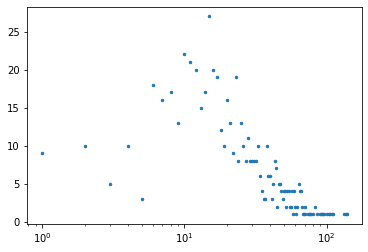

In [10]:
de=nx.degree(G,weight=True)
deg=[v for k,v in list(de)]
er={}

for i in deg:
    if i in er:
        er[i]+=1
    else:
        er[i]=1
x=[]
y=[]
for i,j in er.items():
    x.append(i)
    y.append(j)
with open('worm-degree.txt','w') as fin:
    wsr=['%d\t%d'%(i,j)for i,j in zip(x,y)]
    fin.write('\n'.join(wsr))
plt.axes(xscale='log')
plt.scatter(x,y,s=6)